In [3]:
from gecam.data.evt import Evt
from gecam.analysis.burst_duration import BurstDuration
from gecam.data.detector import Detector, GRD

In [3]:
import numba
numba.__version__

'0.35.0'

In [1]:
from gecam.utils import duration_utils_bootstrap

UntypedAttributeError: Failed at nopython (nopython frontend)
Unknown attribute 'argwhere' of type Module(<module 'numpy' from 'C:\\Users\\10500\\.conda\\envs\\gecamTools\\lib\\site-packages\\numpy\\__init__.py'>)
File "..\gecam\utils\duration_utils_bootstrap.py", line 142
[1] During: typing of get attribute at C:\Users\10500\PycharmProjects\gecamTools\gecam\utils\duration_utils_bootstrap.py (142)

In [4]:
# 事例文件路径
evt_path = r"D:\sougou_download\gbg_evt_tn210511_112749_fb_v00.fits"
# evt_path=r"E:\gecamTools\test\gbg_evt_tn211121_065951_gb_v01.fits"
evt = Evt.open(evt_path)

In [5]:
# 获取触发事例数据中的触发时间
trig_met = evt.info.trig_met

In [7]:
det_list = [GRD(18, gain_type="both"), GRD(17, gain_type="both"),
            GRD(16, gain_type="both"), GRD(15, gain_type="both")]


slice_kwargs_dic = {
    "time_range": [trig_met - 30, trig_met + 40],
    "only_recommend": True
}
lc_kwargs_dic = {
    "time_bin": 0.1,
    "channel_bin": [0, 498]
}

duration_obj = BurstDuration()
lc_dic, total_lc_data,exposures_list=duration_obj.generate_total_light_curve_with_detectors(evt, det_list, slice_kwargs_dic,
                                                                                lc_kwargs_dic)

bg18H
bg18L
bg17H
bg17L
bg16H
bg16L
bg15H
bg15L


In [9]:
dets_total_lc_x, dets_total_lc_1D_y, dets_total_lc_1D_y_err=total_lc_data

src_time_range=[trig_met - 5, trig_met + 10]

duration_utils_bootstrap.calc_duration(dets_total_lc_x[:-1],dets_total_lc_x[1:],dets_total_lc_1D_y,exposures_list,
                                       src_time_range,order=1,f=0.9)

UntypedAttributeError: Failed at nopython (nopython frontend)
Unknown attribute 'argwhere' of type Module(<module 'numpy' from 'C:\\Users\\10500\\.conda\\envs\\gecamTools\\lib\\site-packages\\numpy\\__init__.py'>)
File "..\gecam\utils\duration_utils_bootstrap.py", line 165
[1] During: typing of get attribute at C:\Users\10500\PycharmProjects\gecamTools\gecam\utils\duration_utils_bootstrap.py (165)

In [4]:
det_list = [GRD(18, gain_type="both"), GRD(17, gain_type="both"),
            GRD(16, gain_type="both"), GRD(15, gain_type="both")]


slice_kwargs_dic = {
    "time_range": [trig_met - 30, trig_met + 40],
    "only_recommend": True
}
lc_kwargs_dic = {
    "time_bin": 0.1,
    "channel_bin": [0, 498]
}
lc_bg_fit_kwargs_dic = {
    "bg_time_range": [[trig_met - 30, trig_met - 5], [trig_met + 15, trig_met + 40]],
    "fit_order": 1
}
duration_obj = BurstDuration()
lc_dic, cumsum_net_lc_data=duration_obj.generate_net_light_curve_with_detectors(evt, det_list, slice_kwargs_dic,
                                                                                lc_kwargs_dic,lc_bg_fit_kwargs_dic)

bg18H
bg18L
bg17H
bg17L
bg16H
bg16L
bg15H
bg15L


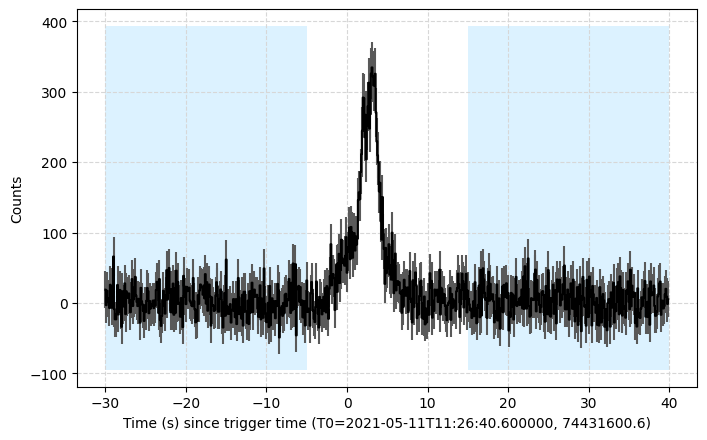

In [5]:
## 查看净光变

from gecam.plot.light_curve import LightCurveFigure

net_lc_x,net_lc_y,net_lc_y_err=duration_obj.net_lc_1D_data
lc_bg_range=lc_bg_fit_kwargs_dic.get("bg_time_range")

det_sliced_lc_fig = LightCurveFigure((net_lc_x[:-1],net_lc_y,net_lc_y_err),
                                     trig_time=duration_obj.evt_info.trig_met, dpi=100)
det_sliced_lc_fig.add_background(bg_time_range=lc_bg_range)
det_sliced_lc_fig.set_ylabel("Counts")

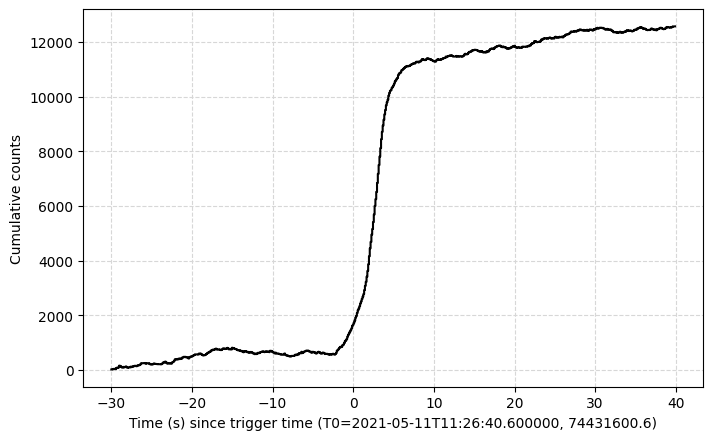

In [6]:

# 查看净光变的累计计数曲线，方便选取累计曲线的本底范围
set_time_range=None
cumsum_lc_fig = duration_obj.plot_light_curve_cumsum(set_time_range=set_time_range)

In [9]:

# 累计曲线的本底范围
cumsum_bg_range = [[trig_met - 30, trig_met - 20], [trig_met + 9, trig_met + 20]]

t90, t90_err,t50, t50_err=duration_obj.cal_burst_duration_by_cumsum_counts(cumsum_bg_range)

print("T90:",round(t90,4),"T90 error:",round(t90_err,4),"T90 start met:", duration_obj._T90_start)
print("T50:",round(t50,4),"T50 error:",round(t50_err,4),"T50 start met:", duration_obj._T50_start)

KeyboardInterrupt: 

In [12]:
# set_time_range 用于限制图像的起始时间

# set_time_range = [trig_met - 10, trig_met + 10]
set_time_range=None
cumsum_lc_fig = duration_obj.plot_light_curve_cumsum(set_time_range=set_time_range)

In [56]:
np.sum(dets_net_lc_y, axis=0), dets_net_lc_y.shape

(-2328.278789139513, (400,))

In [80]:
plt.plot(dets_net_lc_y_cumsum)
plt.fill_between([bg1_index_start, bg1_index_stop], -1000, 2000)
plt.fill_between([bg0_index_start, bg0_index_stop], -1000, 2000)

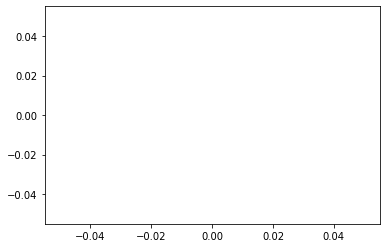

In [51]:
plt.plot(bg1_y_cumsum)

In [46]:
a = np.array([1, 2, 3])
np.cumsum(a)

array([1, 3, 6], dtype=int32)

In [39]:

det = GRD(18)
lc_time_bin = 1
lc_bg_range = lc_bg_range = [
    [trig_met - 20, trig_met - 10], [trig_met + 30, trig_met + 60]
]
lc_time_range = [trig_met - 30, trig_met + 40]

det_events_all = evt.select_detector(det.number)

if lc_time_range is None:
    lc_time_range = [min(lc_bg_range)[0] - lc_time_bin, max(lc_bg_range)[1] + lc_time_bin]

det_events = det_events_all.slice(gain_type=det.gain_type)
det_lc = det_events.to_light_curve(time_bin=lc_time_bin)
det_bg_lc = det_lc.fit_background(lc_bg_range, "2pass", 1)
# bg_spec_data, bg_spec_err = det_bg_lc.background_fitter.interpolate(lc_time_range[0], lc_time_range[1],
#                                                                      src_exposure_sum)

total_x, total_y, total_y_err = det_lc.get_plot_data()

bg_x, bg_y, bg_y_err = det_bg_lc.get_plot_data()

plt.plot(total_x - trig_met, total_y)
plt.plot(bg_x - trig_met, bg_y)

C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:266: RankWarning: The fit may be poorly conditioned
  self._coeffs[i] = self._weighted_leastsq(X, y[i], w[i], False)
C:\Users\10500\PycharmProjects\gecamTools\gecam\fitting\polynomial_fitter.py:204: RuntimeWarning: background model has negative value in following channel(s) (starting from 0): 356, 357, 361, 363, 365, 367, 368, 376, 377, 382, 383, 385, 397, 398, 399, 400

This error maybe eliminated by reducing the order of polynomial (the current is 1).
  RuntimeWarning


In [40]:
a, b, c = det_lc.get_data()

In [41]:
a.shape, b.shape, c.shape

((401,), (498, 400), (498, 400))

In [18]:
_ = det_bg_lc.show_fitting_quality()

In [30]:
total_x, total_y, total_y_err = det_lc.get_plot_data()

In [31]:
x, y, y_err = det_bg_lc.get_plot_data()

In [23]:
x.shape, y.shape

((400,), (400,))

In [25]:
import matplotlib.pyplot as plt

In [32]:
plt.plot(total_x, total_y)
plt.plot(x, y)

In [10]:
import numpy as np

In [11]:
lc_bg_range = [
    [10, 20], [30, 40]
]

In [12]:
min(lc_bg_range)[0], max(lc_bg_range)[1]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

[-1 -1  1  1]


array([1], dtype=int64)

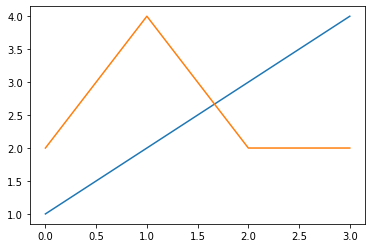

In [171]:
a = np.array([1, 2, 3, 4])
b = np.array([2, 4, 2, 2])
plt.plot(a)
plt.plot(b)

get_start_index_of_cross_point(a,b)

In [169]:
sign = np.sign(a - b)
sign

array([-1, -1,  1,  1])

In [168]:
np.where((sign[1:] + sign[:-1]) == 0)

(array([1], dtype=int64),)